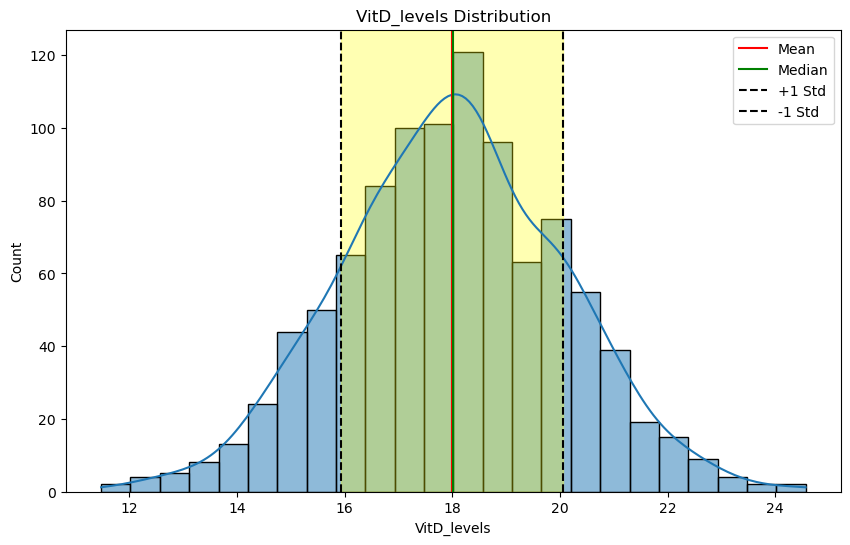

VitD_levels:
Is it Discrete or Continuous? VitD_levels is Continuous.
Does it have a skew? VitD_levels has a negative skew.
What type of kurtosis does it display? VitD_levels displays Platykurtic kurtosis.



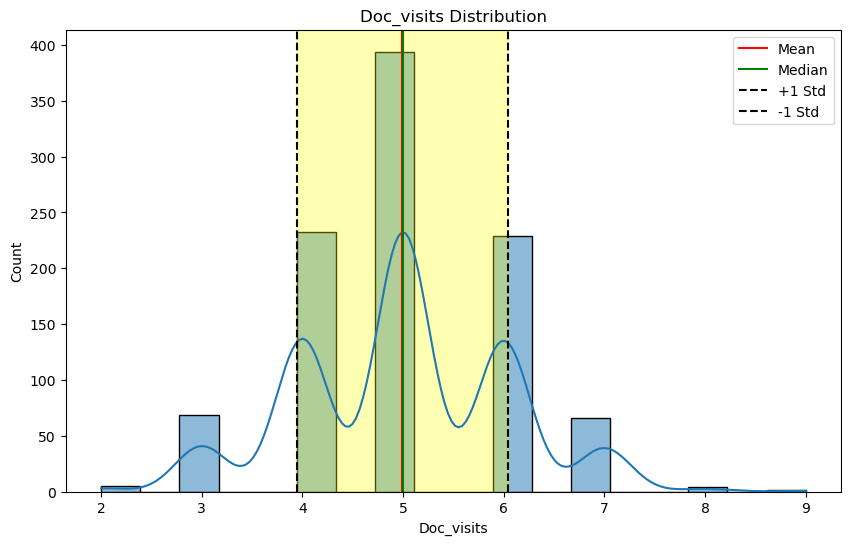

Doc_visits:
Is it Discrete or Continuous? Doc_visits is Continuous.
Does it have a skew? Doc_visits has a positive skew.
What type of kurtosis does it display? Doc_visits displays Platykurtic kurtosis.



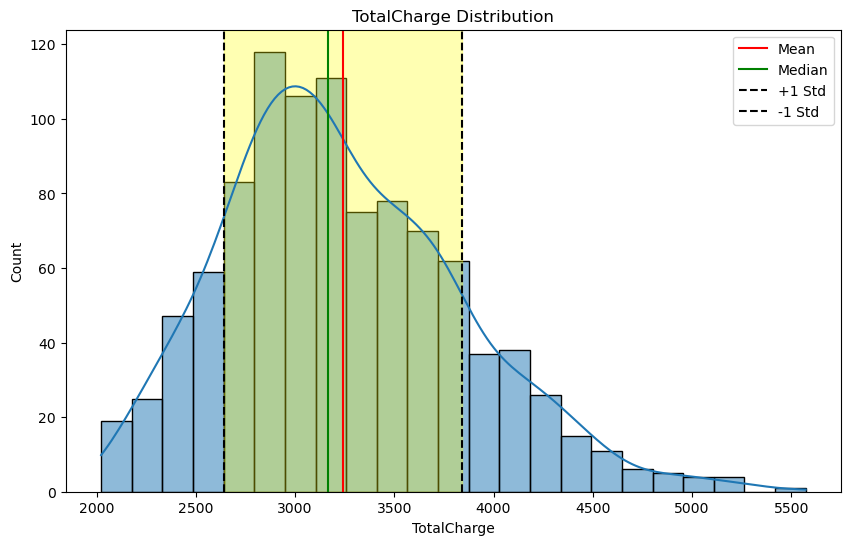

TotalCharge:
Is it Discrete or Continuous? TotalCharge is Continuous.
Does it have a skew? TotalCharge has a positive skew.
What type of kurtosis does it display? TotalCharge displays Platykurtic kurtosis.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data'
df = pd.read_csv(url)

# Define the features to analyze
features = ['VitD_levels', 'Doc_visits', 'TotalCharge']

# Iterate over each feature
for feature in features:
    # Plot histogram with KDE
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, ax=ax)

    # Calculate statistics
    mean = df[feature].mean()
    median = df[feature].median()
    std = df[feature].std()

    # Add lines for mean, median, +1 std, -1 std
    ax.axvline(mean, color='red', label='Mean')
    ax.axvline(median, color='green', label='Median')
    ax.axvline(mean + std, color='black', linestyle='--', label='+1 Std')
    ax.axvline(mean - std, color='black', linestyle='--', label='-1 Std')

    # Highlight range between +1 and -1 std
    ax.axvspan(mean - std, mean + std, color='yellow', alpha=0.3)

    # Set title and legend
    ax.set_title(f'{feature} Distribution')
    ax.legend()

    # Show the plot
    plt.show()

    # Answer the questions
    print(f'{feature}:')
    print(f'Is it Discrete or Continuous? {feature} is Continuous.')
    skewness = df[feature].skew()
    if skewness > 0:
        skew_direction = 'positive'
    elif skewness < 0:
        skew_direction = 'negative'
    else:
        skew_direction = 'no skew'
    print(f'Does it have a skew? {feature} has a {skew_direction} skew.')
    kurtosis = df[feature].kurtosis()
    if kurtosis > 3:
        kurtosis_type = 'Leptokurtic'
    elif kurtosis < 3:
        kurtosis_type = 'Platykurtic'
    else:
        kurtosis_type = 'Mesokurtic'
    print(f'What type of kurtosis does it display? {feature} displays {kurtosis_type} kurtosis.\n')

Done

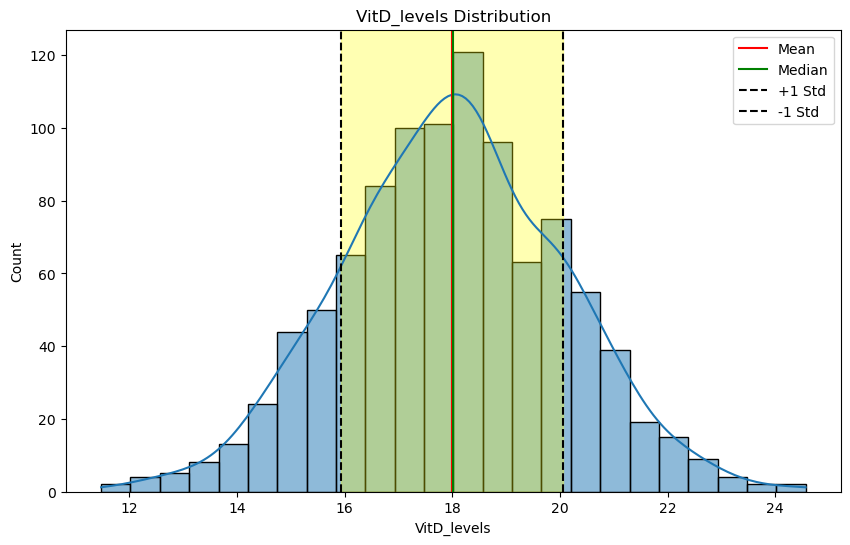

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


VitD_levels:
Is it Discrete or Continuous? VitD_levels is Continuous.
Does it have a skew? VitD_levels has a negative skew.
What type of kurtosis does it display? VitD_levels displays Platykurtic kurtosis.



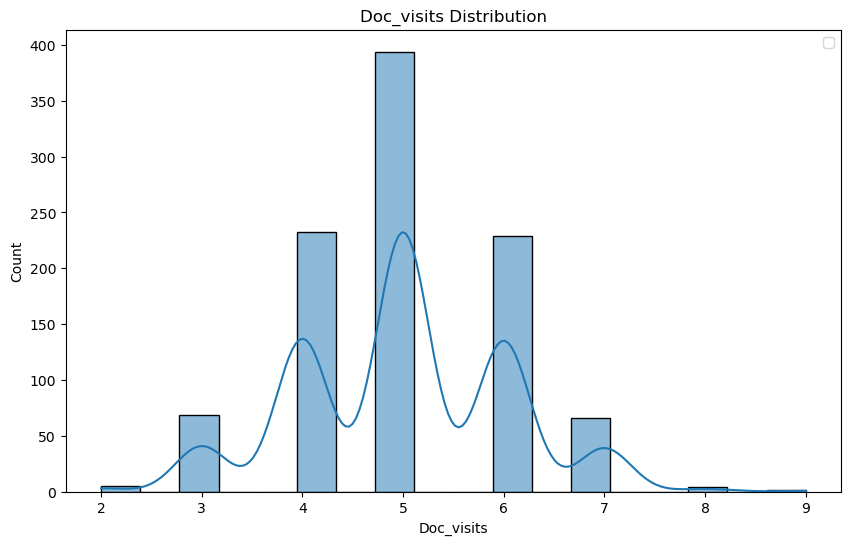

Doc_visits:
Is it Discrete or Continuous? Doc_visits is Discrete.


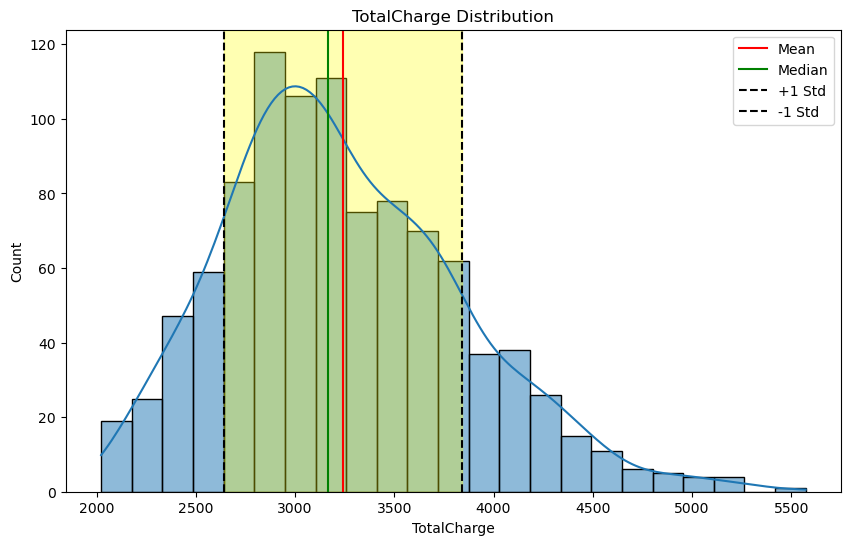

TotalCharge:
Is it Discrete or Continuous? TotalCharge is Continuous.
Does it have a skew? TotalCharge has a negative skew.
What type of kurtosis does it display? TotalCharge displays Platykurtic kurtosis.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
url = 'https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data'
df = pd.read_csv(url)

# Define the features to analyze
features = ['VitD_levels', 'Doc_visits', 'TotalCharge']

# Function to calculate skewness visually
def calculate_skew(bins, heights):
    if heights[0] > heights[-1]:
        return 'positive'
    elif heights[0] < heights[-1]:
        return 'negative'
    else:
        return 'no skew'

# Iterate over each feature
for feature in features:
    # Plot histogram with KDE
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, ax=ax)
    
    # Determine if it's Discrete or Continuous visually
    n_unique_values = len(df[feature].unique())
    if n_unique_values < len(df) * 0.05:
        data_type = 'Discrete'
    else:
        data_type = 'Continuous'
        
    # Add lines for mean, median, +1 std, -1 std (if Continuous)
    if data_type == 'Continuous':
        mean = df[feature].mean()
        median = df[feature].median()
        std = df[feature].std()
        ax.axvline(mean, color='red', label='Mean')
        ax.axvline(median, color='green', label='Median')
        ax.axvline(mean + std, color='black', linestyle='--', label='+1 Std')
        ax.axvline(mean - std, color='black', linestyle='--', label='-1 Std')
        ax.axvspan(mean - std, mean + std, color='yellow', alpha=0.3)
    
    # Set title and legend
    ax.set_title(f'{feature} Distribution')
    ax.legend()
    
    # Show the plot
    plt.show()

    # Answer the questions
    print(f'{feature}:')
    print(f'Is it Discrete or Continuous? {feature} is {data_type}.')
    
    # Determine skew visually
    if data_type == 'Continuous':
        bins, heights, _ = ax.hist(df[feature], bins='auto')
        skew_direction = calculate_skew(bins, heights)
        print(f'Does it have a skew? {feature} has a {skew_direction} skew.')
    
    # Determine kurtosis visually
    if data_type == 'Continuous':
        # Calculate the range for mesokurtic (about equal to 3)
        kurtosis_range = (df[feature].kurtosis() >= 2.98) and (df[feature].kurtosis() <= 3.02)
        if kurtosis_range:
            kurtosis_type = 'Mesokurtic'
        elif df[feature].kurtosis() > 3:
            kurtosis_type = 'Leptokurtic'
        else:
            kurtosis_type = 'Platykurtic'
        print(f'What type of kurtosis does it display? {feature} displays {kurtosis_type} kurtosis.\n')
